In [4]:
fin <- read.csv("Wholesale customers data.csv", header = T)

In [5]:
summary(fin)

    Channel          Region          Fresh             Milk      
 Min.   :1.000   Min.   :1.000   Min.   :     3   Min.   :   55  
 1st Qu.:1.000   1st Qu.:2.000   1st Qu.:  3128   1st Qu.: 1533  
 Median :1.000   Median :3.000   Median :  8504   Median : 3627  
 Mean   :1.323   Mean   :2.543   Mean   : 12000   Mean   : 5796  
 3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.: 16934   3rd Qu.: 7190  
 Max.   :2.000   Max.   :3.000   Max.   :112151   Max.   :73498  
    Grocery          Frozen        Detergents_Paper    Delicassen     
 Min.   :    3   Min.   :   25.0   Min.   :    3.0   Min.   :    3.0  
 1st Qu.: 2153   1st Qu.:  742.2   1st Qu.:  256.8   1st Qu.:  408.2  
 Median : 4756   Median : 1526.0   Median :  816.5   Median :  965.5  
 Mean   : 7951   Mean   : 3071.9   Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.:10656   3rd Qu.: 3554.2   3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :92780   Max.   :60869.0   Max.   :40827.0   Max.   :47943.0  

In [6]:
head(fin)

Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,3,12669,9656,7561,214,2674,1338
2,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
1,3,13265,1196,4221,6404,507,1788
2,3,22615,5410,7198,3915,1777,5185
2,3,9413,8259,5126,666,1795,1451


In [8]:
top.n.custs <- function (data,cols,n=5) { #Requires some data frame and the top N to remove
idx.to.remove <-integer(0) #Initialize a vector to hold customers being removed
for (c in cols){ # For every column in the data we passed to this function
col.order <-order(data[,c],decreasing=T) #Sort column "c" in descending order (bigger on top)
#Order returns the sorted index (e.g. row 15, 3, 7, 1, ...) rather than the actual values sorted.
idx <-head(col.order, n) #Take the first n of the sorted column C to
idx.to.remove <-union(idx.to.remove,idx) #Combine and de-duplicate the row ids that need to be removed
}
return(idx.to.remove) #Return the indexes of customers to be removed
}


In [9]:
top.custs <-top.n.custs(fin, cols = 3:8, n = 5)

In [10]:
length(top.custs)

[1] 19

In [12]:
fin[top.custs,]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
182,1,3,112151,29627,18148,16745,4948,8550
126,1,3,76237,3473,7102,16538,778,918
285,1,3,68951,4411,12609,8692,751,2406
40,1,3,56159,555,902,10002,212,2916
259,1,1,56083,4563,2124,6422,730,3321
87,2,3,22925,73498,32114,987,20070,903
48,2,3,44466,54259,55571,7782,24171,6465
86,2,3,16117,46197,92780,1026,40827,2944
184,1,3,36847,43950,20170,36534,239,47943


In [15]:
data.rm.top <- fin[-c(top.custs),] # Remove the clusters

In [16]:
set.seed(76964057)

In [17]:
k <- kmeans(data.rm.top[,-c(1,2)], centers = 5)

In [18]:
k$centers

Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
5830.214,15295.048,23449.167,1936.452,10361.6429,1912.738
18649.606,3335.586,4497.848,3301.747,1046.5859,1450.566
5845.392,2337.319,2878.205,2766.596,660.2952,858.994
4238.892,7725.289,11011.747,1336.566,4733.3614,1400.530
35922.387,4851.806,5862.581,3730.677,1004.6129,1552.161


In [19]:
table(k$cluster)


  1   2   3   4   5 
 42  99 166  83  31 

In [20]:
rng <- 2:20

In [21]:
tries <- 100

In [25]:
avg.totw.ss <- integer(length(rng))

In [26]:
for(v in rng){
    v.totw.ss <- integer(tries)
    for(i in 1:tries){
    k.temp <- kmeans(data.rm.top, centers = v)
    v.totw.ss[i] <- k.temp$tot.withinss
}
    avg.totw.ss[v-1] <- mean(v.totw.ss)
}

Warning message:
"did not converge in 10 iterations"

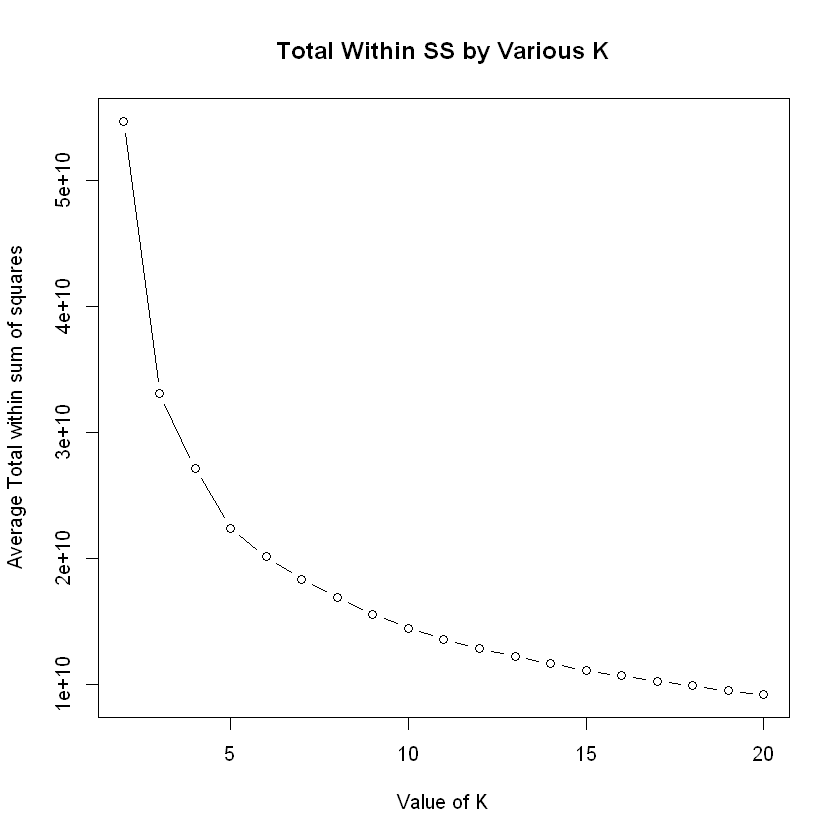

In [27]:
plot(rng,avg.totw.ss, type = 'b', main = "Total Within SS by Various K", ylab = "Average Total within sum of squares", xlab = "Value of K")